<a href="https://colab.research.google.com/github/seeedata/BADA/blob/main/0525%20Cluster%20Analysis%20Practice/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment

실습 세션 때는 구매액 - 구매수량을 H - M - L로 나누었는데, 너무 세분화한 건 아닐까?

H - L로 단순화해보고 9개로 나눴을 때랑 비교해보자.

#Import

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 데이터 가져오기

In [6]:
marketing_data = pd.read_csv('/content/drive/MyDrive/BADA/0525 군집 분석 실습/marketing_campaign.CSV', encoding = 'cp949')
marketing_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


Attributes(Variable Description)

People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

# 데이터 전처리

## 결측치 제거

In [7]:
marketing_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
marketing_data.dropna(inplace=True)
marketing_data.reset_index(inplace=True)
marketing_data.isnull().sum()

index                  0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [9]:
marketing_data.drop(columns=['index'], inplace=True)
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## 범주형 자료 수치화

In [10]:
le = preprocessing.LabelEncoder()

marketing_data['Education'] = le.fit_transform(marketing_data['Education'])
marketing_data['Marital_Status'] = le.fit_transform(marketing_data['Marital_Status'])

print(marketing_data['Education'].head())
print(marketing_data['Marital_Status'].head())

0    2
1    2
2    2
3    2
4    4
Name: Education, dtype: int64
0    4
1    4
2    5
3    5
4    3
Name: Marital_Status, dtype: int64


In [11]:
#Year_Birth는 나이로 바꾼다
age_list = []

for y in marketing_data['Year_Birth']:
    age = 2023 - y
    age_list.append(age)

marketing_data['Year_Birth'] = age_list

# 필요한 feature들 생성

## 1. 총 구매 수량 feature 생성


In [12]:
purchase_var = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']  #구매 채널별 구매 횟수
length = len(marketing_data['ID'])
purchase_num = []

for i in range(length):
    purchases = 0
    for purchase in purchase_var:
        k = marketing_data.loc[i, purchase]
        purchases += k

    purchase_num.append(purchases)

print(length == len(purchase_num))

True


In [13]:
marketing_data['Num_Total_Purchase'] = purchase_num
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Num_Total_Purchase
0,5524,66,2,4,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,22
1,2174,69,2,4,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,4
2,4141,58,2,5,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,20
3,6182,39,2,5,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,6
4,5324,42,4,3,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,14


## 2. 총 구매액 feature 생성

In [14]:
money_spent = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
length = len(marketing_data['ID'])
total_spent = []

for i in range(length):
    money = 0
    for product in money_spent:
        k = marketing_data.loc[i, product]
        money += k

    total_spent.append(money)

print(length == len(total_spent))

True


In [16]:
marketing_data['Total_Expenditure'] = total_spent
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Num_Total_Purchase,Total_Expenditure
0,5524,66,2,4,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,22,1617
1,2174,69,2,4,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,4,27
2,4141,58,2,5,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,20,776
3,6182,39,2,5,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,6,53
4,5324,42,4,3,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,14,422


# 고객 분할

## 1. 총 구매 수량을 기준으로 한 고객 분할

In [17]:
print(marketing_data['Num_Total_Purchase'].quantile(0.5))

12.0


In [18]:
labeled_amount = []
#총 구매 수량을 분위수를 기준으로 high - low로 나누어 라벨링
criteria = marketing_data['Num_Total_Purchase'].quantile(0.5)

for purchases in marketing_data['Num_Total_Purchase']:
    if purchases < criteria:
        labeled_amount.append('Low')
    else:
        labeled_amount.append('High')

marketing_data['Labeled_Purchase_Amount'] = labeled_amount
marketing_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Num_Total_Purchase,Total_Expenditure,Labeled_Purchase_Amount
0,5524,66,2,4,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,22,1617,High
1,2174,69,2,4,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,4,27,Low
2,4141,58,2,5,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,20,776,High
3,6182,39,2,5,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,6,53,Low
4,5324,42,4,3,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,14,422,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,56,2,3,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,16,1341,High
2212,4001,77,4,5,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,3,11,0,15,444,High
2213,7270,42,2,2,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,18,1241,High
2214,8235,67,3,5,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,21,843,High


## 2. 총 구매액을 기준으로 한 고객 분할




In [19]:
print(marketing_data['Total_Expenditure'].quantile(0.5))

396.5


In [20]:
labeled_expenditure = []
#총 구매액을 분위수를 기준으로 high - low로 나누어 라벨링
criteria1 = marketing_data['Total_Expenditure'].quantile(0.5)

for expenditure in marketing_data['Total_Expenditure']:
    if expenditure < criteria:
        labeled_expenditure.append('Low')
    else:
        labeled_expenditure.append('High')

marketing_data['Labeled_Expenditure'] = labeled_expenditure
marketing_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Num_Total_Purchase,Total_Expenditure,Labeled_Purchase_Amount,Labeled_Expenditure
0,5524,66,2,4,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,22,1617,High,High
1,2174,69,2,4,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,4,27,Low,High
2,4141,58,2,5,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,20,776,High,High
3,6182,39,2,5,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,6,53,Low,High
4,5324,42,4,3,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,14,422,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,56,2,3,61223.0,0,1,2013-06-13,46,709,...,0,0,0,3,11,0,16,1341,High,High
2212,4001,77,4,5,64014.0,2,1,2014-06-10,56,406,...,1,0,0,3,11,0,15,444,High,High
2213,7270,42,2,2,56981.0,0,0,2014-01-25,91,908,...,0,0,0,3,11,0,18,1241,High,High
2214,8235,67,3,5,69245.0,0,1,2014-01-24,8,428,...,0,0,0,3,11,0,21,843,High,High


## 3. 총 구매액과 총 구매 수량을 기준으로 한 4그룹의 분할

In [21]:
md_AHEH = marketing_data[(marketing_data['Labeled_Purchase_Amount'] == 'High') & (marketing_data['Labeled_Expenditure'] == 'High')]
md_AHEL = marketing_data[(marketing_data['Labeled_Purchase_Amount'] == 'High') & (marketing_data['Labeled_Expenditure'] == 'Low')]
md_ALEH = marketing_data[(marketing_data['Labeled_Purchase_Amount'] == 'Low') & (marketing_data['Labeled_Expenditure'] == 'High')]
md_ALEL = marketing_data[(marketing_data['Labeled_Purchase_Amount'] == 'Low') & (marketing_data['Labeled_Expenditure'] == 'Low')]

In [22]:
print(len(md_AHEH))
print(len(md_AHEL))
print(len(md_ALEH))
print(len(md_ALEL))

1159
0
1038
19


- AHEH, ALEH인 고객 수가 많은 것을 관찰할 수 있다.
- AHEH 고객 대상으로 군집화를 진행할 것이다.

# K-means 군집화

In [26]:
people_infos = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome']


def kmeansclustering(df, people_infos):
    K = range(1, 10)
    distance = []
    for k in K:
        km = KMeans(n_clusters = k, random_state = 5)
        km.fit(df.loc[:, people_infos])
        distance.append(km.inertia_)
    plt.figure(figsize = (10, 8))
    plt.plot(K, distance)
    plt.show()


def kmeansclustering2(df, people_infos):
    num = int(input())  #클러스터 개수 지정
    km = KMeans(n_clusters=num, random_state=5)
    km.fit(df.loc[:, people_infos])
    group = km.labels_.tolist()
    df['Cluster'] = group
    print(df['Cluster'])

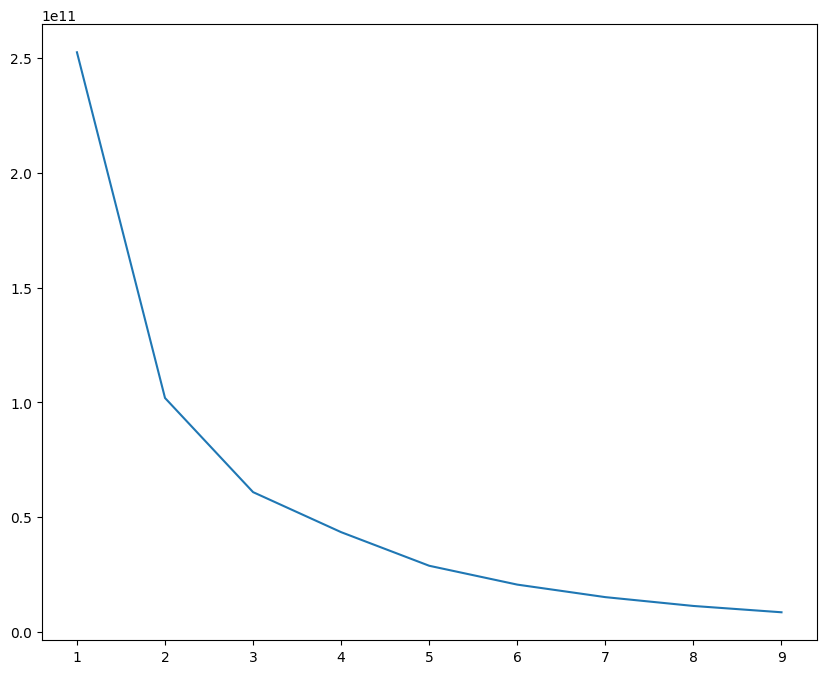

In [28]:
kmeansclustering(md_AHEH, people_infos)

In [29]:
kmeansclustering2(md_AHEH, people_infos)

5
0       0
2       4
4       0
5       0
6       0
       ..
2207    3
2211    0
2212    0
2213    0
2214    4
Name: Cluster, Length: 1159, dtype: int64


# 정규화 후 K-means 군집화

In [30]:
def minmaxScalar(df, feature):
    max1 = df[feature].max()
    min1 = df[feature].min()
    df[feature] = (df[feature] - min1) / (max1 - min1)
    return(df)

def variousScaling(df, features):
    for a in features:
        df = minmaxScalar(df, a)
    return(df)

In [31]:
variousScaling(md_AHEH, people_infos)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Num_Total_Purchase,Total_Expenditure,Labeled_Purchase_Amount,Labeled_Expenditure,Cluster
0,5524,0.395833,0.50,0.571429,0.351682,0.0,0.0,2012-09-04,58,635,...,0,0,3,11,1,22,1617,High,High,0
2,4141,0.312500,0.50,0.714286,0.436775,0.0,0.0,2013-08-21,26,426,...,0,0,3,11,0,20,776,High,High,4
4,5324,0.145833,1.00,0.428571,0.352661,0.5,0.0,2014-01-19,94,173,...,0,0,3,11,0,14,422,High,High,0
5,7446,0.291667,0.75,0.714286,0.379310,0.0,0.5,2013-09-09,16,520,...,0,0,3,11,0,20,716,High,High,0
6,965,0.250000,0.50,0.285714,0.335876,0.0,0.5,2012-11-13,34,235,...,0,0,3,11,0,17,590,High,High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,9817,0.260417,0.75,0.571429,0.267467,0.0,0.0,2012-08-21,71,853,...,0,0,3,11,0,25,1049,High,High,3
2211,10870,0.291667,0.50,0.428571,0.371164,0.0,0.5,2013-06-13,46,709,...,0,0,3,11,0,16,1341,High,High,0
2212,4001,0.510417,1.00,0.714286,0.388789,1.0,0.5,2014-06-10,56,406,...,0,0,3,11,0,15,444,High,High,0
2213,7270,0.145833,0.50,0.285714,0.344376,0.0,0.0,2014-01-25,91,908,...,0,0,3,11,0,18,1241,High,High,0


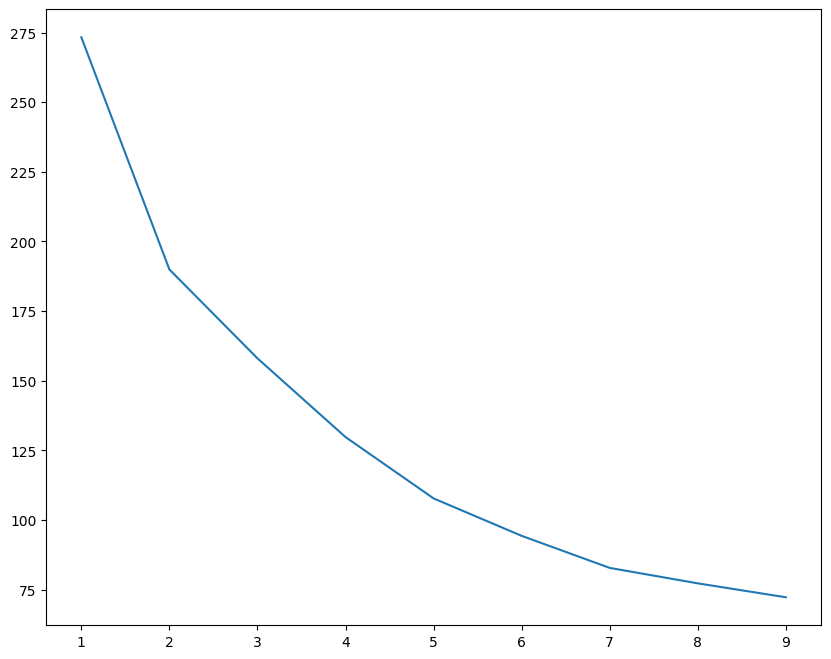

In [32]:
kmeansclustering(md_AHEH, people_infos)

In [33]:
kmeansclustering2(md_AHEH, people_infos)

7
0       2
2       2
4       3
5       5
6       0
       ..
2207    1
2211    0
2212    4
2213    2
2214    5
Name: Cluster, Length: 1159, dtype: int64


In [34]:
md_AHEH_scaled = md_AHEH.copy()
md_AHEH_scaled

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Num_Total_Purchase,Total_Expenditure,Labeled_Purchase_Amount,Labeled_Expenditure,Cluster
0,5524,0.395833,0.50,0.571429,0.351682,0.0,0.0,2012-09-04,58,635,...,0,0,3,11,1,22,1617,High,High,2
2,4141,0.312500,0.50,0.714286,0.436775,0.0,0.0,2013-08-21,26,426,...,0,0,3,11,0,20,776,High,High,2
4,5324,0.145833,1.00,0.428571,0.352661,0.5,0.0,2014-01-19,94,173,...,0,0,3,11,0,14,422,High,High,3
5,7446,0.291667,0.75,0.714286,0.379310,0.0,0.5,2013-09-09,16,520,...,0,0,3,11,0,20,716,High,High,5
6,965,0.250000,0.50,0.285714,0.335876,0.0,0.5,2012-11-13,34,235,...,0,0,3,11,0,17,590,High,High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,9817,0.260417,0.75,0.571429,0.267467,0.0,0.0,2012-08-21,71,853,...,0,0,3,11,0,25,1049,High,High,1
2211,10870,0.291667,0.50,0.428571,0.371164,0.0,0.5,2013-06-13,46,709,...,0,0,3,11,0,16,1341,High,High,0
2212,4001,0.510417,1.00,0.714286,0.388789,1.0,0.5,2014-06-10,56,406,...,0,0,3,11,0,15,444,High,High,4
2213,7270,0.145833,0.50,0.285714,0.344376,0.0,0.0,2014-01-25,91,908,...,0,0,3,11,0,18,1241,High,High,2


## 실루엣 계수

In [36]:
label = md_AHEH['Cluster']
silhouette_score(md_AHEH.loc[:,people_infos], label)

0.36150431160392144

✅ 실습 세션 때와 달리, 구매액과 구매수량을 상위 50%, 하위 50%로 나눠 구매액 H-L, 구매수량 H-L로 분류했다.

✅ 정규화 이후 K-Means 군집화를 적용했을 때, 적절한 클러스터 수는 7개였고, 이때 실루엣 계수는 0.3615였다.

✅ 실습 세션 때의 클러스터 수(5개)보다 클러스터 수가 증가하였고, 실습 때의 실루엣 계수(0.3251)보다 실루엣 계수도 증가하였다.

# 독립성 검정

In [48]:
def IndependenceTest(df, a, b):
    C = pd.crosstab(df[a], df[b])  #교차표 생성
    chi, p, dof, expected = chi2_contingency(C)  #교차표 C 기반으로 카이제곱 독립성 검정 수행

    print(f"chi 스퀘어 값: {chi}",
          f"p-value (0.05): {p}",
          f"자유도 수: {dof}",
          f"기대값: \n{pd.DataFrame(expected)}",
          f"측정값: \n{C}", sep = "\n")

In [46]:
for col in people_infos:
    IndependenceTest(md_AHEH, 'Cluster', col)

chi 스퀘어 값: 887.3139468338625
p-value (0.05): 2.437002333291881e-19
자유도 수: 540
기대값: 
          0         1         2         3         4         5         6   \
0   0.346851  0.346851  0.578085  0.578085  1.271786  0.693701  1.040552   
1   0.647110  0.647110  1.078516  1.078516  2.372735  1.294219  1.941329   
2   0.181191  0.181191  0.301984  0.301984  0.664366  0.362381  0.543572   
3   0.631579  0.631579  1.052632  1.052632  2.315789  1.263158  1.894737   
4   0.300259  0.300259  0.500431  0.500431  1.100949  0.600518  0.900777   
5   0.310613  0.310613  0.517688  0.517688  1.138913  0.621225  0.931838   
6   0.204487  0.204487  0.340811  0.340811  0.749784  0.408973  0.613460   
7   0.103538  0.103538  0.172563  0.172563  0.379638  0.207075  0.310613   
8   0.108714  0.108714  0.181191  0.181191  0.398619  0.217429  0.326143   
9   0.111303  0.111303  0.185505  0.185505  0.408110  0.222606  0.333909   
10  0.054357  0.054357  0.090595  0.090595  0.199310  0.108714  0.163072   

   

✅ people_infos의 변수들이 독립성 검정을 모두 기각한다. 즉, 해당 변수들과 cluster 간에 연관성이 존재한다.

# 캠페인 반응 확인

In [52]:
#원본 데이터에서 AHEH인 것들만 뽑아내자.
marketing_data['Cluster'] = md_AHEH_scaled['Cluster']
cluster_origin = marketing_data.dropna()
cluster_origin

#이제 cluster == 0, 1, 2, 3, 4, 5, 6 별로 나눠주자
cluster0_origin = cluster_origin[cluster_origin['Cluster'] == 0]
cluster1_origin = cluster_origin[cluster_origin['Cluster'] == 1]
cluster2_origin = cluster_origin[cluster_origin['Cluster'] == 2]
cluster3_origin = cluster_origin[cluster_origin['Cluster'] == 3]
cluster4_origin = cluster_origin[cluster_origin['Cluster'] == 4]
cluster5_origin = cluster_origin[cluster_origin['Cluster'] == 5]
cluster6_origin = cluster_origin[cluster_origin['Cluster'] == 6]

In [53]:
col  = ['NumDealsPurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

count_pop = []
for i in col:
  num = sum(marketing_data[i])
  count_pop.append(num)

count0 = []
for i in col:
  num = sum(cluster0_origin[i])
  count0.append(num)

count1 = []
for i in col:
  num = sum(cluster1_origin[i])
  count1.append(num)

count2 = []
for i in col:
  num = sum(cluster2_origin[i])
  count2.append(num)

count3 = []
for i in col:
  num = sum(cluster3_origin[i])
  count3.append(num)

count4 = []
for i in col:
  num = sum(cluster4_origin[i])
  count4.append(num)

count5 = []
for i in col:
  num = sum(cluster5_origin[i])
  count5.append(num)

count6 = []
for i in col:
  num = sum(cluster6_origin[i])
  count6.append(num)

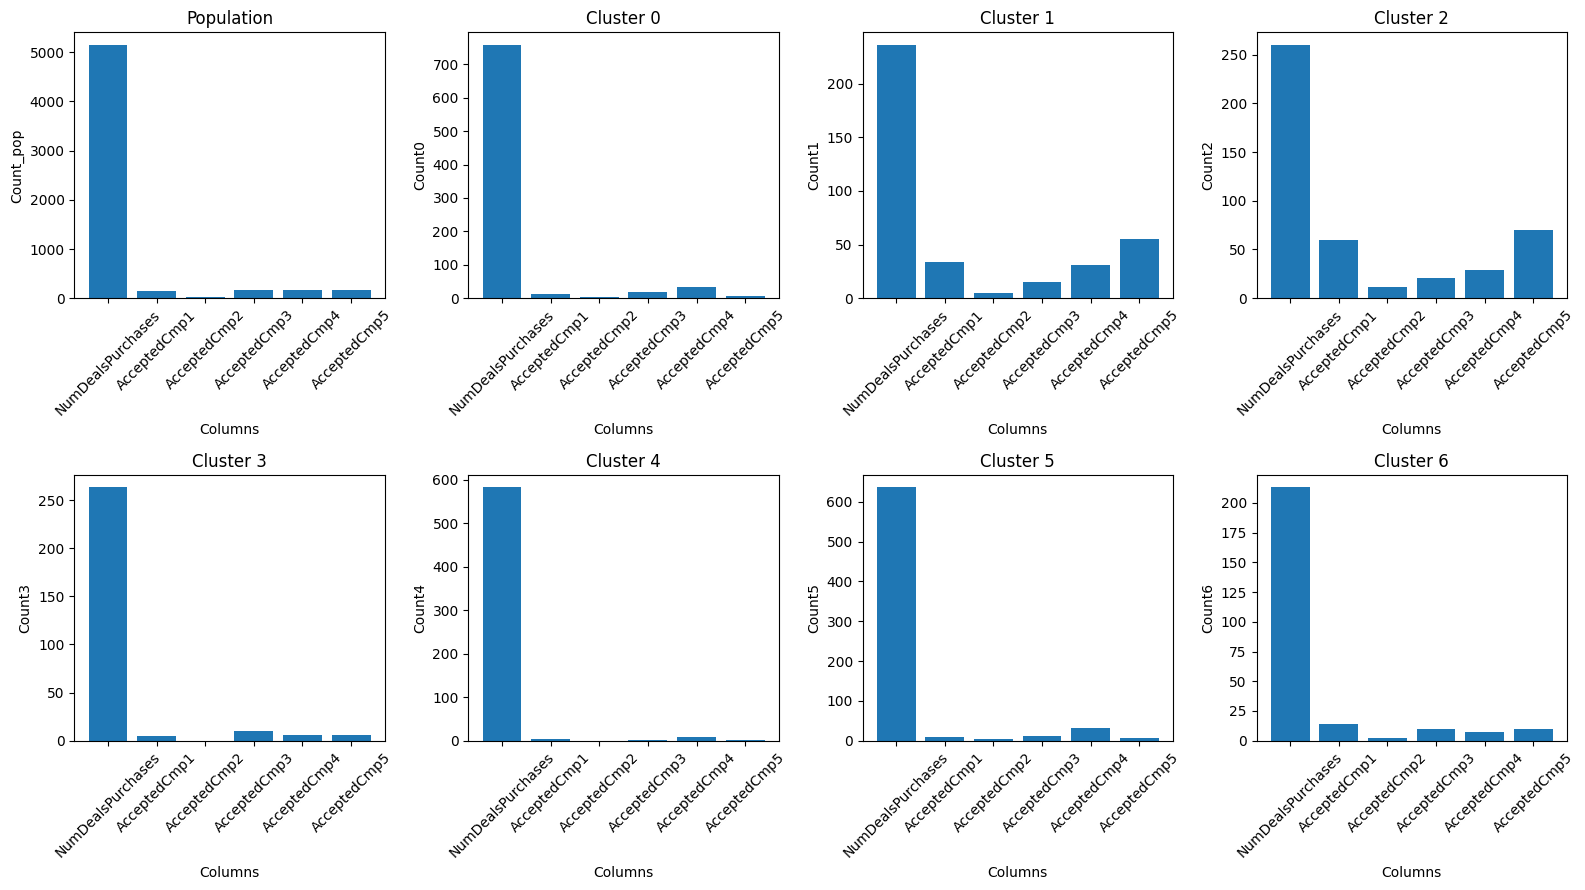

In [54]:
fig = plt.figure(figsize=(16, 9))

ax1 = fig.add_subplot(2, 4, 1)
ax1.bar(col, count_pop)
ax1.set_xlabel('Columns')
ax1.set_ylabel('Count_pop')
ax1.set_xticklabels(col, rotation=45)
ax1.set_title('Population')

ax2 = fig.add_subplot(2, 4, 2)
ax2.bar(col, count0)
ax2.set_xlabel('Columns')
ax2.set_ylabel('Count0')
ax2.set_xticklabels(col, rotation=45)
ax2.set_title('Cluster 0')

ax3 = fig.add_subplot(2, 4, 3)
ax3.bar(col, count1)
ax3.set_xlabel('Columns')
ax3.set_ylabel('Count1')
ax3.set_xticklabels(col, rotation=45)
ax3.set_title('Cluster 1')

ax4 = fig.add_subplot(2, 4, 4)
ax4.bar(col, count2)
ax4.set_xlabel('Columns')
ax4.set_ylabel('Count2')
ax4.set_xticklabels(col, rotation=45)
ax4.set_title('Cluster 2')

ax5 = fig.add_subplot(2, 4, 5)
ax5.bar(col, count3)
ax5.set_xlabel('Columns')
ax5.set_ylabel('Count3')
ax5.set_xticklabels(col, rotation=45)
ax5.set_title('Cluster 3')

ax6 = fig.add_subplot(2, 4, 6)
ax6.bar(col, count4)
ax6.set_xlabel('Columns')
ax6.set_ylabel('Count4')
ax6.set_xticklabels(col, rotation=45)
ax6.set_title('Cluster 4')

ax6 = fig.add_subplot(2, 4, 7)
ax6.bar(col, count5)
ax6.set_xlabel('Columns')
ax6.set_ylabel('Count5')
ax6.set_xticklabels(col, rotation=45)
ax6.set_title('Cluster 5')

ax6 = fig.add_subplot(2, 4, 8)
ax6.bar(col, count6)
ax6.set_xlabel('Columns')
ax6.set_ylabel('Count6')
ax6.set_xticklabels(col, rotation=45)
ax6.set_title('Cluster 6')

plt.tight_layout()
plt.show()

✅ 기본적으로 모든 클러스터에서 할인을 받고 구매한 경우가 압도적으로 많다.

✅ cluster1과 cluster2가 population을 포함한 다른 그룹들보다 campaign에 반응하는 비율이 높은 것을 확인할 수 있다.

✅ cluster1, 2에 속한 사람들에게 campaign을 더 적극적으로 하면 추가적인 매출 증가에 도움이 되지 않을까?



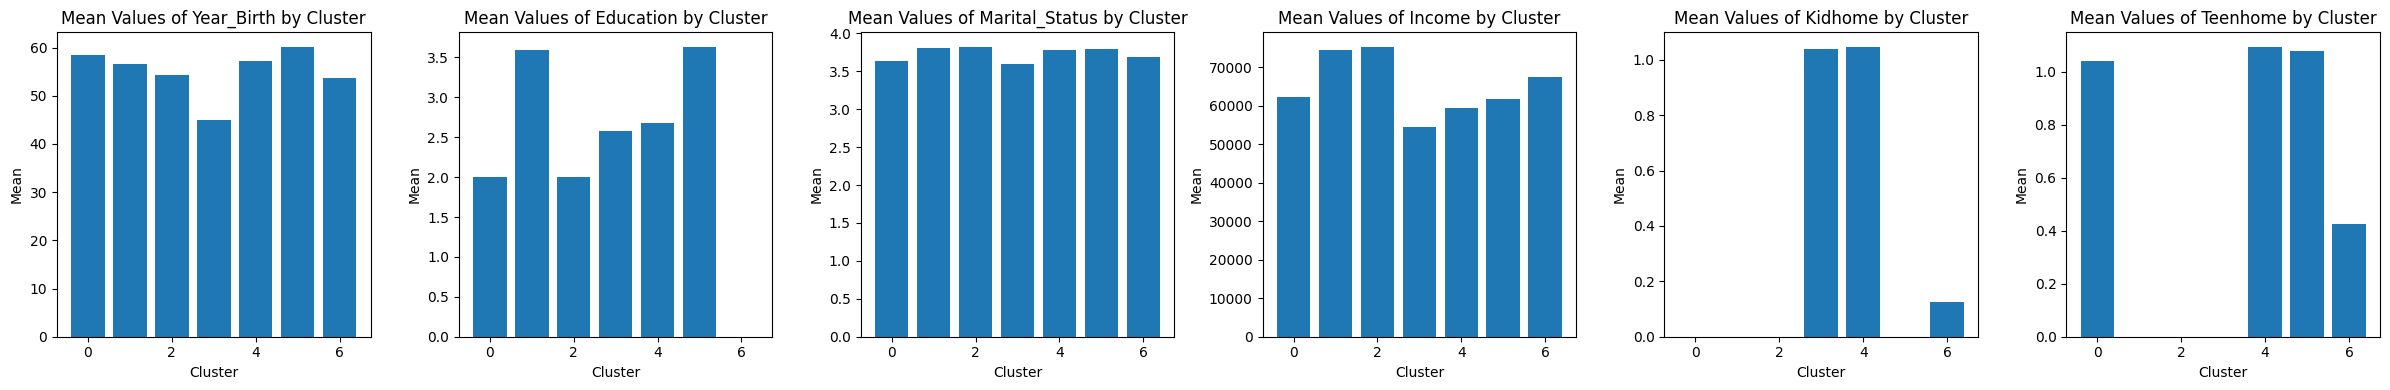

In [55]:
grouped_means = cluster_origin.groupby('Cluster', as_index=True)[people_infos].mean()

fig, axes = plt.subplots(1, len(people_infos), figsize=(4 * len(people_infos), 4))
for i, column in enumerate(people_infos):
    axes[i].bar(grouped_means.index, grouped_means[column])
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Mean')
    axes[i].set_title(f'Mean Values of {column} by Cluster')

plt.tight_layout()
plt.show()

✅ cluster1, cluster2는 income이 가장 높다.

✅ cluster1, cluster2의 가장 큰 특징은 Kidhome과 Teenhome에서 나타난다. 다른 클러스터와 달리 집에 자녀가 없다는 특징을 가지고 있다.

⏩ 돈은 많이 벌지만 자녀는 없는 집에 campaign 마케팅을 집중적으로 해보자!
